<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: 1. Data Preparation:
# Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

import pandas as pd
import numpy as np


try:
  data = pd.read_excel('/content/heart_disease.xlsx')
  print("Dataset loaded successfully.")
except FileNotFoundError:
  print("Error: '/content/heart_disease.xlsx' not found. Please check the file path.")
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

# Display the first few rows of the dataset (optional)
# print(data.head())


Dataset loaded successfully.



Header found at row index 0. Reloading with that as header...

First 5 Rows:
   age  Age in years
0  NaN           NaN
1  NaN           NaN
2  NaN           NaN
3  NaN           NaN
4  NaN           NaN

Missing Values:
age             12
Age in years    12
dtype: int64

Summary Statistics:
       age  Age in years
count  0.0           0.0
mean   NaN           NaN
std    NaN           NaN
min    NaN           NaN
25%    NaN           NaN
50%    NaN           NaN
75%    NaN           NaN
max    NaN           NaN


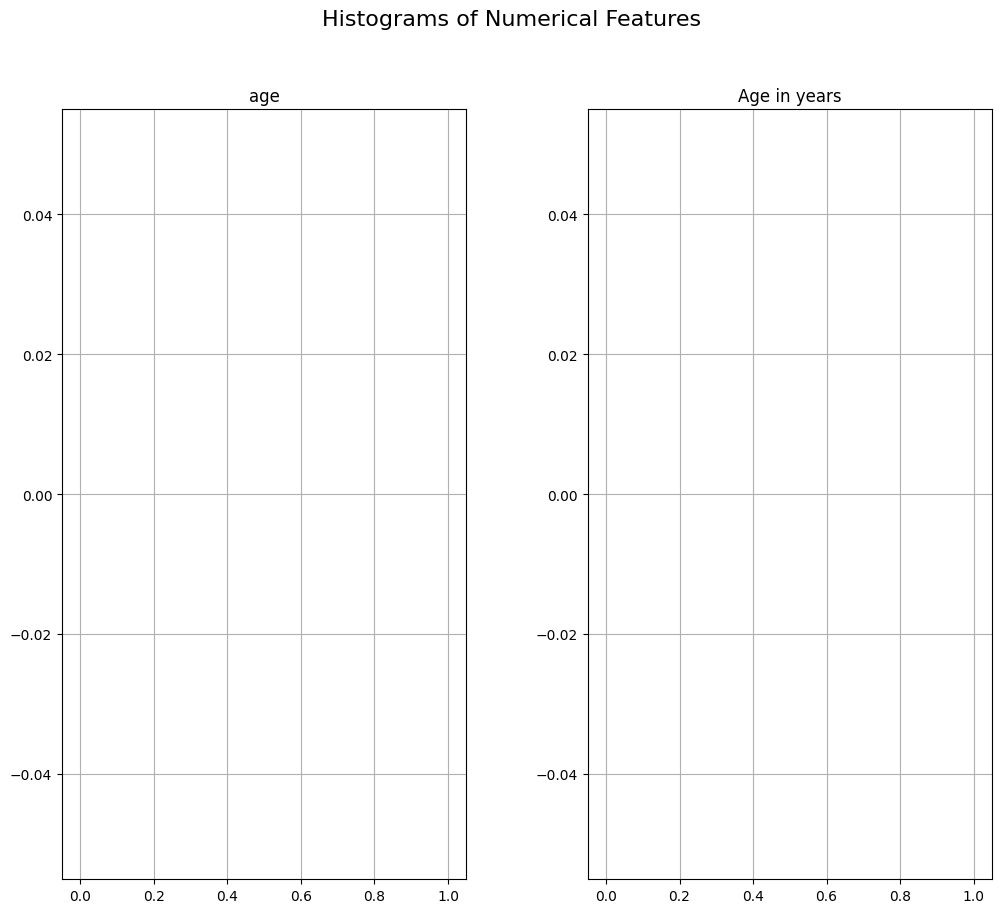

Skipping box plot for age due to insufficient data.
Skipping box plot for Age in years due to insufficient data.


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


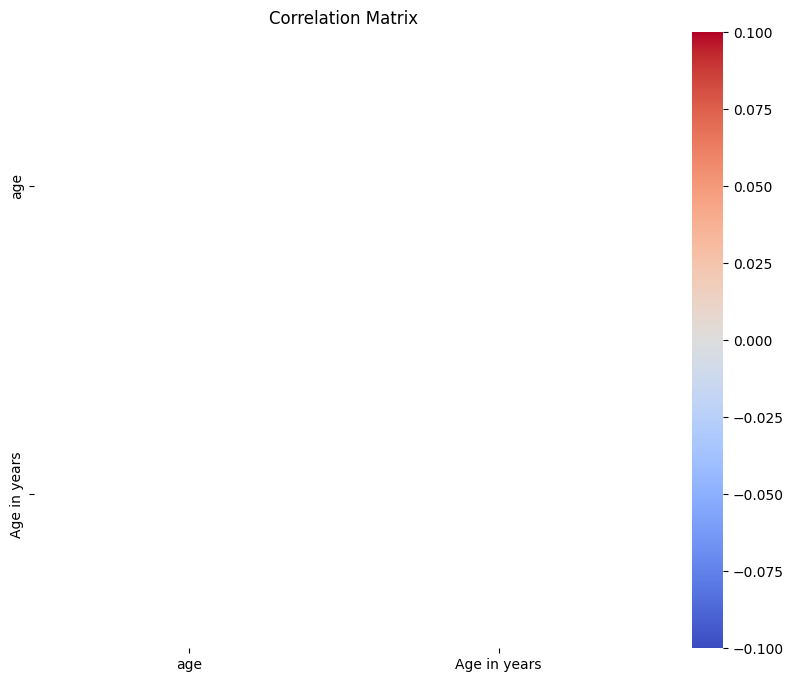


Potential Outliers in 'age':
Empty DataFrame
Columns: [age]
Index: []


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load raw file to inspect all rows
raw = pd.read_excel('/content/heart_disease.xlsx', header=None)

# Step 2: Try to find header row by searching for expected column like 'age'
header_row = None
for i in range(len(raw)):
    if raw.iloc[i].astype(str).str.contains('age', case=False).any():
        header_row = i
        break

if header_row is not None:
    print(f"\nHeader found at row index {header_row}. Reloading with that as header...\n")
    data = pd.read_excel('/content/heart_disease.xlsx', header=header_row)

    # Clean unnamed or empty columns
    data = data.dropna(axis=1, how='all')
    data = data.loc[:, ~data.columns.astype(str).str.contains('^Unnamed')]

    # Convert to numeric where applicable
    data = data.apply(pd.to_numeric, errors='coerce')

    # Show basic info
    print("First 5 Rows:")
    print(data.head())

    print("\nMissing Values:")
    print(data.isnull().sum())

    print("\nSummary Statistics:")
    print(data.describe())

    # Histograms
    data.select_dtypes(include='number').hist(figsize=(12, 10), bins=20)
    plt.suptitle("Histograms of Numerical Features", fontsize=16)
    plt.show()

    # Box Plots
    for column in data.select_dtypes(include='number').columns:
        # Skip columns with no valid data after removing NaNs
        if data[column].dropna().shape[0] > 0:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=data[column].dropna())  # Drop NaNs to avoid issues
            plt.title(f'Box Plot of {column}')
            plt.show()
        else:
            print(f"Skipping box plot for {column} due to insufficient data.")

    # Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Outlier Detection (for 'age')
    if 'age' in data.columns:
        Q1 = data['age'].quantile(0.25)
        Q3 = data['age'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
        print("\nPotential Outliers in 'age':")
        print(outliers[['age']])
    else:
        print("\nColumn 'age' not found.")
else:
    print("Could not find a header row with expected column names like 'age'. Please inspect the file manually.")


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Excel file and parse the data sheet
xls = pd.ExcelFile("heart_disease.xlsx")
df = xls.parse('Heart_disease')

# Copy the dataset
df_fe = df.copy()

# Define feature categories
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
binary_categorical_features = ['sex', 'fbs', 'exang']
multi_categorical_features = ['cp', 'restecg', 'slope', 'thal']

# Handle missing values
df_fe[numerical_features] = df_fe[numerical_features].fillna(df_fe[numerical_features].mean())
df_fe[binary_categorical_features + multi_categorical_features] = df_fe[binary_categorical_features + multi_categorical_features].fillna("Unknown")

# Convert binary categorical features to string for Label Encoding
df_fe[binary_categorical_features] = df_fe[binary_categorical_features].astype(str)

# Apply Label Encoding to binary categorical features
label_encoder = LabelEncoder()
for col in binary_categorical_features:
    df_fe[col] = label_encoder.fit_transform(df_fe[col])

# Apply One-Hot Encoding to multi-category features
df_fe = pd.get_dummies(df_fe, columns=multi_categorical_features)

# Scale numerical features
scaler = StandardScaler()
df_fe[numerical_features] = scaler.fit_transform(df_fe[numerical_features])

# Preview the transformed dataset
print(df_fe.head())


        age  sex  trestbps      chol  fbs    thalch  exang   oldpeak  num  \
0  1.006027    1  0.567394  0.281297    1  0.524183      1  1.334996    0   
1 -1.397560    1  0.076967  0.013526    0 -0.147705      1 -0.844594    0   
2  0.350503    1  0.322181 -0.084656    0  0.449529      1 -0.465535    0   
3 -0.195767    1 -0.756760 -0.138211    0  2.017268      1 -0.844594    0   
4  0.350503    1 -1.149102 -0.004325    0 -0.371668      3  0.576878    0   

   cp_asymptomatic  ...  cp_typical angina  restecg_lv hypertrophy  \
0            False  ...               True                    True   
1            False  ...              False                   False   
2             True  ...              False                   False   
3            False  ...               True                    True   
4             True  ...              False                   False   

   restecg_normal  restecg_st-t abnormality  slope_downsloping  slope_flat  \
0           False                     

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Assuming df_fe is the feature-engineered DataFrame from previous steps

# Separate features and target
X = df_fe.drop('num', axis=1)  # Features
y = df_fe['num']               # Target

# Convert target to binary (0 = no disease, 1 = presence of disease)
y = (y > 0).astype(int)

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7307692307692307
Precision: 0.7682926829268293
Recall: 0.6774193548387096
F1-score: 0.72
ROC-AUC: 0.731968104385647

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        89
           1       0.77      0.68      0.72        93

    accuracy                           0.73       182
   macro avg       0.73      0.73      0.73       182
weighted avg       0.73      0.73      0.73       182



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create base model
dt = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1-score:", f1_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.7700425129900802

Test Accuracy: 0.7527472527472527
Test Precision: 0.7608695652173914
Test Recall: 0.7526881720430108
Test F1-score: 0.7567567567567568
Test ROC-AUC: 0.8524827836172526

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75        89
           1       0.76      0.75      0.76        93

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182



Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75        89
           1       0.76      0.75      0.76        93

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182



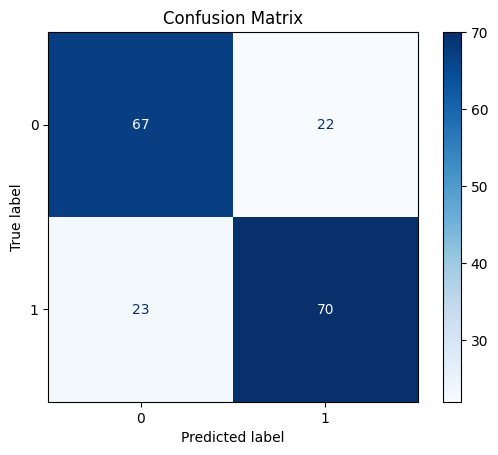

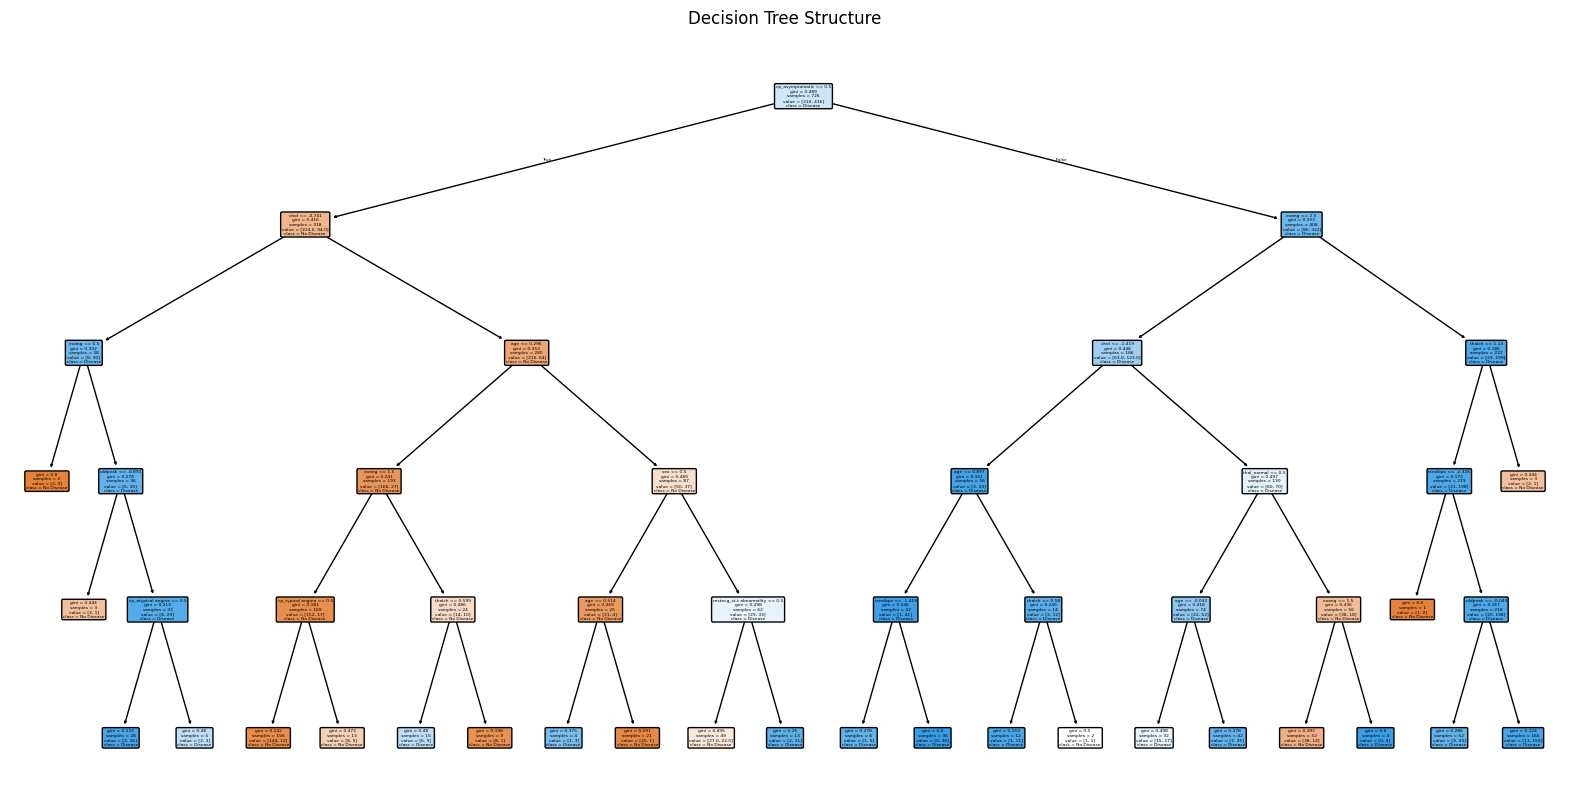

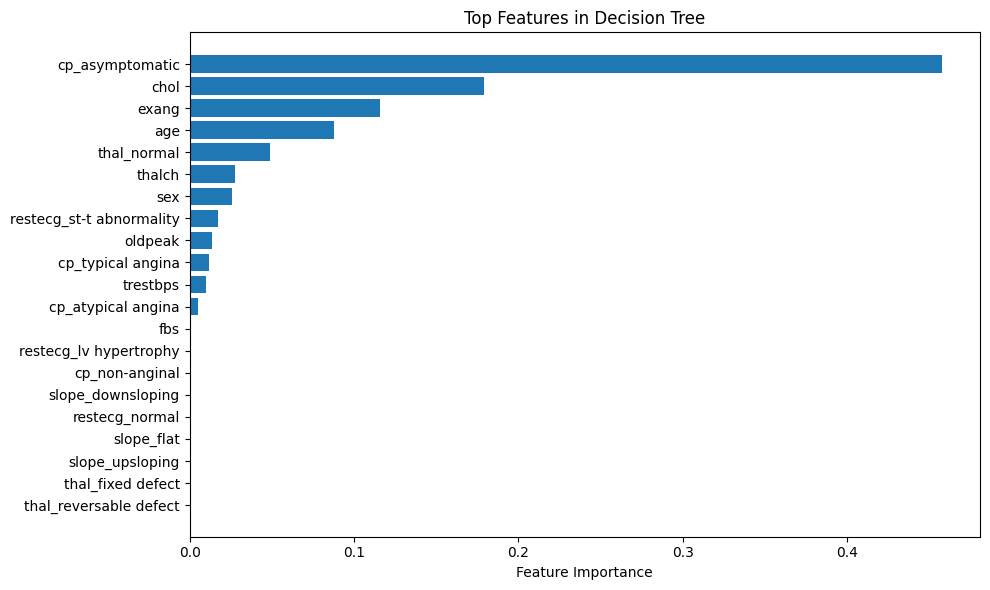

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. Evaluation Metrics (already done, you can reuse this block if needed)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 2. Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

# 3. Feature Importance
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top Features in Decision Tree")
plt.tight_layout()
plt.show()


What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Decision Tree models have several key hyperparameters that directly impact their complexity, accuracy, and generalization. Here's a list of **common hyperparameters** along with their **effects**:

---

### 1. **`max_depth`**

* **What it does:** Limits how deep the tree can grow.
* **Effect:**

  * *Too shallow*: Underfitting — can't capture complexity.
  * *Too deep*: Overfitting — captures noise in training data.

---

### 2. **`min_samples_split`**

* **What it does:** Minimum number of samples required to split an internal node.
* **Effect:**

  * *Higher value*: Less complex tree, prevents overfitting.
  * *Lower value*: More splits, potentially overfitting.

---

### 3. **`min_samples_leaf`**

* **What it does:** Minimum number of samples required at a leaf node.
* **Effect:**

  * *Larger value*: Smooths the model, can improve generalization.
  * *Smaller value*: More detailed rules, but may overfit.

---

### 4. **`max_features`**

* **What it does:** Limits the number of features to consider at each split.
* **Effect:**

  * *Smaller value*: Introduces randomness, useful for ensembles (e.g., Random Forests).
  * *Larger value*: More consistent trees, but higher variance.

---

### 5. **`criterion`**

* **What it does:** Function to measure the quality of a split (`"gini"` for Gini impurity, `"entropy"` for information gain).
* **Effect:**

  * *Entropy*: Can lead to more complex trees.
  * *Gini*: Often faster and gives similar results.

---

### 6. **`max_leaf_nodes`**

* **What it does:** Limits the number of leaf nodes.
* **Effect:**

  * *Lower value*: Prunes the tree, simpler model.
  * *Higher value*: Potential overfitting.

---

### 7. **`class_weight`**

* **What it does:** Weighs classes during training (especially useful for imbalanced datasets).
* **Effect:**

  * Helps improve recall on minority class by penalizing misclassification more.


What is the difference between the Label encoding and One-hot encoding?

The main difference between **Label Encoding** and **One-Hot Encoding** lies in **how they represent categorical variables** for machine learning models.

---

###  **Label Encoding**

* **What it does:** Converts each category into a unique integer.

  Example:

  ```
  Color: [Red, Green, Blue] → [0, 1, 2]
  ```

* **Pros:**

  * Very compact; uses just one column.
  * Works well for **ordinal data** (e.g., Low, Medium, High).

* **Cons:**

  * **Imposes an artificial order** on nominal data, which can mislead models into thinking one category is "greater" than another.

---

###  **One-Hot Encoding**

* **What it does:** Creates a new binary column for each category. Each row gets a `1` in the column that corresponds to its category, and `0` elsewhere.

  Example:

  ```
  Color: Red → [1, 0, 0]
         Green → [0, 1, 0]
         Blue → [0, 0, 1]
  ```

* **Pros:**

  * Does **not imply any ordering**; best for **nominal data**.
  * More model-friendly when categories have no ranking.

* **Cons:**

  * Increases dimensionality (especially for features with many categories), which can lead to **curse of dimensionality**.

---

### Quick Summary

| Feature                  | Label Encoding                       | One-Hot Encoding                              |
| ------------------------ | ------------------------------------ | --------------------------------------------- |
| Output Format            | Single integer column                | Multiple binary columns                       |
| Ordinal Compatibility    | Yes                                  | No                                            |
| Risk of Misleading Order | Yes                                  | No                                            |
| Memory Efficient         | ✅                                    | ❌ (uses more space)                           |
| Model Compatibility      | Best for trees (can handle integers) | Best for linear models, distance-based models |


